In [162]:
import argparse
import os
import numpy as np
import math
import sys


from torch.utils.data import DataLoader
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch.autograd as autograd
import torch

In [163]:

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

cuda = True if torch.cuda.is_available() else False
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

In [164]:
class Generator(nn.Module):
    def __init__(self, latent_dim,samples_dim):
        super(Generator, self).__init__()

        def block(in_feat, out_feat, normalize=True):
            layers = [nn.Linear(in_feat, out_feat)]
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat, 0.8))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(latent_dim, 50, normalize=False),
            nn.Linear(50, samples_dim)
        )

    def forward(self, z):
        img = self.model(z)
        return img


In [207]:

class Discriminator(nn.Module):
    def __init__(self, samples_dim):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(samples_dim, 50),
            nn.LeakyReLU(0.1, inplace=True),
            nn.Linear(50, 50),
            nn.LeakyReLU(.1, inplace=True),
            nn.Linear(50, 1),        
        )

    def forward(self, x):
        validity = self.model(x)
        return validity

In [208]:
def compute_gradient_penalty(D, real_samples, fake_samples):
    """Calculates the gradient penalty loss for WGAN GP"""
    # Random weight term for interpolation between real and fake samples
    alpha = Tensor(np.random.random((real_samples.size(0), 1, 1, 1)))
    # Get random interpolation between real and fake samples
    interpolates = (alpha * real_samples + ((1 - alpha) * fake_samples)).requires_grad_(True)
    d_interpolates = D(interpolates)
  #  fake = Variable(Tensor(real_samples.shape[0], 1).fill_(1.0), requires_grad=False)
    # Get gradient w.r.t. interpolates
    gradients = d_interpolates.view(d_interpolates.size(0), -1)
    gradient_penalty = ((gradients.norm(2, dim=1) - 1)).mean()
    return gradient_penalty

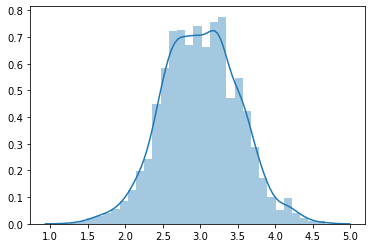

In [209]:
import seaborn as sns
m = torch.distributions.normal.Normal(torch.tensor([3.0]), torch.tensor([.5]))
real_data=m.sample([2000]).to(device)
real_data.shape
sns.distplot(real_data.cpu())

In [210]:
lat_dim=5
samples_dim=1
C=1.

# Initialize generator and discriminator
generator = Generator(lat_dim,samples_dim)
discriminator = Discriminator(samples_dim)


if cuda:
    generator.cuda()
    discriminator.cuda()


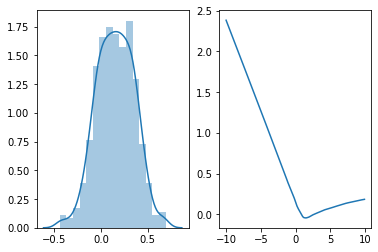

In [211]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


def viewGAN(discriminator, generator):
    fig, ax= plt.subplots(1,2)

    X=torch.arange(-10.,10.,0.1)
    Y=discriminator(X.unsqueeze(1).to(device)).detach().cpu()
    ax[1].plot(X,Y)


    z = Tensor(np.random.normal(0, 1, (500, lat_dim)))
    fake_data=generator(z).detach().cpu()
    sns.distplot(fake_data, ax=ax[0])
    plt.show()
viewGAN(discriminator, generator)

In [212]:
b1=0.5 #0.5
b2=0.9999
lr=0.001

# Optimizers
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(b1, b2))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=0.0008, betas=(b1, b2))





[Epoch 0/5000] [D loss: -1.924884] [G loss: -0.113798]


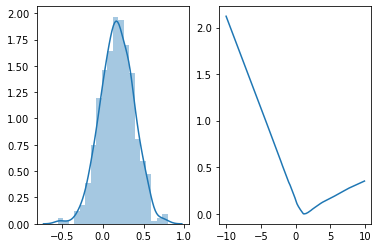

[Epoch 6/5000] [D loss: -6.495486] [G loss: -0.041659]
[Epoch 12/5000] [D loss: -7.926485] [G loss: -0.004120]
[Epoch 18/5000] [D loss: -7.922247] [G loss: -0.005286]
[Epoch 24/5000] [D loss: -8.088653] [G loss: -0.007445]
[Epoch 30/5000] [D loss: -7.978898] [G loss: -0.003168]
[Epoch 36/5000] [D loss: -8.214994] [G loss: -0.005019]
[Epoch 42/5000] [D loss: -8.416678] [G loss: -0.005370]
[Epoch 48/5000] [D loss: -8.564410] [G loss: -0.004477]
[Epoch 54/5000] [D loss: -8.155850] [G loss: -0.003627]
[Epoch 60/5000] [D loss: -8.078251] [G loss: -0.005355]
[Epoch 66/5000] [D loss: -8.936196] [G loss: -0.005655]
[Epoch 72/5000] [D loss: -8.503494] [G loss: -0.004744]
[Epoch 78/5000] [D loss: -8.624992] [G loss: -0.004154]
[Epoch 84/5000] [D loss: -8.365842] [G loss: -0.004908]
[Epoch 90/5000] [D loss: -8.581236] [G loss: -0.003153]
[Epoch 96/5000] [D loss: -8.652280] [G loss: -0.007753]


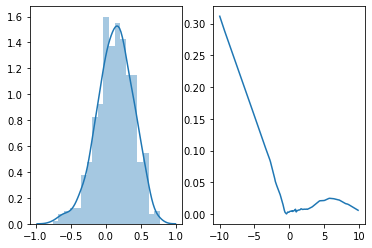

[Epoch 102/5000] [D loss: -8.094954] [G loss: -0.004440]
[Epoch 108/5000] [D loss: -8.143294] [G loss: -0.002859]
[Epoch 114/5000] [D loss: -8.118054] [G loss: -0.003971]
[Epoch 120/5000] [D loss: -8.094348] [G loss: -0.003268]
[Epoch 126/5000] [D loss: -8.923027] [G loss: -0.004874]
[Epoch 132/5000] [D loss: -8.656731] [G loss: -0.006927]
[Epoch 138/5000] [D loss: -8.405348] [G loss: -0.006058]
[Epoch 144/5000] [D loss: -8.499369] [G loss: -0.004254]
[Epoch 150/5000] [D loss: -8.741527] [G loss: -0.004662]
[Epoch 156/5000] [D loss: -8.718568] [G loss: -0.002796]
[Epoch 162/5000] [D loss: -8.954345] [G loss: -0.004645]
[Epoch 168/5000] [D loss: -8.684700] [G loss: -0.002828]
[Epoch 174/5000] [D loss: -8.839840] [G loss: -0.006140]
[Epoch 180/5000] [D loss: -8.722439] [G loss: -0.002083]
[Epoch 186/5000] [D loss: -7.990818] [G loss: -0.003651]
[Epoch 192/5000] [D loss: -8.036636] [G loss: -0.003101]
[Epoch 198/5000] [D loss: -8.287201] [G loss: -0.005536]


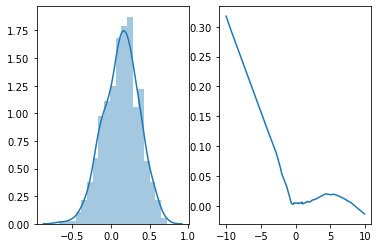

[Epoch 204/5000] [D loss: -8.619107] [G loss: -0.003887]
[Epoch 210/5000] [D loss: -8.367705] [G loss: -0.002453]
[Epoch 216/5000] [D loss: -8.454910] [G loss: -0.000876]
[Epoch 222/5000] [D loss: -8.843652] [G loss: -0.004584]
[Epoch 228/5000] [D loss: -8.903838] [G loss: -0.004941]
[Epoch 234/5000] [D loss: -8.803080] [G loss: -0.004697]
[Epoch 240/5000] [D loss: -8.800552] [G loss: -0.001971]
[Epoch 246/5000] [D loss: -9.051496] [G loss: -0.005091]
[Epoch 252/5000] [D loss: -8.942734] [G loss: -0.005882]
[Epoch 258/5000] [D loss: -9.045597] [G loss: -0.002746]
[Epoch 264/5000] [D loss: -9.150043] [G loss: -0.002464]
[Epoch 270/5000] [D loss: -9.323475] [G loss: -0.004249]
[Epoch 276/5000] [D loss: -8.994473] [G loss: -0.005525]
[Epoch 282/5000] [D loss: -9.069958] [G loss: -0.004253]
[Epoch 288/5000] [D loss: -8.970973] [G loss: -0.002657]
[Epoch 294/5000] [D loss: -8.817827] [G loss: -0.004231]
[Epoch 300/5000] [D loss: -8.915993] [G loss: -0.003279]


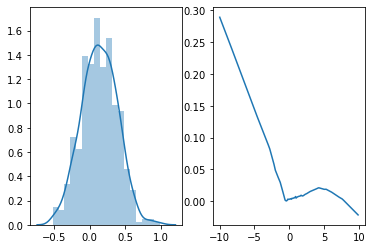

[Epoch 306/5000] [D loss: -9.007568] [G loss: -0.004318]
[Epoch 312/5000] [D loss: -8.639680] [G loss: -0.005992]
[Epoch 318/5000] [D loss: -8.570985] [G loss: -0.002827]
[Epoch 324/5000] [D loss: -8.752459] [G loss: -0.004423]
[Epoch 330/5000] [D loss: -8.911421] [G loss: -0.003236]
[Epoch 336/5000] [D loss: -8.970264] [G loss: -0.003964]
[Epoch 342/5000] [D loss: -9.384027] [G loss: -0.003682]
[Epoch 348/5000] [D loss: -9.356768] [G loss: -0.003444]
[Epoch 354/5000] [D loss: -8.443121] [G loss: -0.003738]
[Epoch 360/5000] [D loss: -8.466582] [G loss: -0.003093]
[Epoch 366/5000] [D loss: -8.470742] [G loss: -0.003944]
[Epoch 372/5000] [D loss: -8.532762] [G loss: -0.003298]
[Epoch 378/5000] [D loss: -8.837232] [G loss: -0.003989]
[Epoch 384/5000] [D loss: -9.251760] [G loss: -0.004657]
[Epoch 390/5000] [D loss: -9.185016] [G loss: -0.003596]
[Epoch 396/5000] [D loss: -9.192955] [G loss: -0.001969]


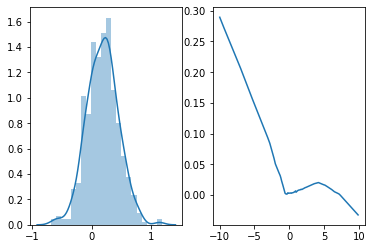

[Epoch 402/5000] [D loss: -9.229455] [G loss: -0.003608]
[Epoch 408/5000] [D loss: -9.049140] [G loss: -0.001717]
[Epoch 414/5000] [D loss: -9.382154] [G loss: -0.004237]
[Epoch 420/5000] [D loss: -9.372192] [G loss: -0.002457]
[Epoch 426/5000] [D loss: -9.152367] [G loss: -0.003602]
[Epoch 432/5000] [D loss: -9.535171] [G loss: -0.006512]
[Epoch 438/5000] [D loss: -8.511203] [G loss: -0.005003]
[Epoch 444/5000] [D loss: -8.518325] [G loss: -0.003280]
[Epoch 450/5000] [D loss: -8.751953] [G loss: -0.003689]
[Epoch 456/5000] [D loss: -9.226132] [G loss: -0.006073]
[Epoch 462/5000] [D loss: -8.220992] [G loss: -0.003805]
[Epoch 468/5000] [D loss: -8.326612] [G loss: -0.002403]
[Epoch 474/5000] [D loss: -8.878856] [G loss: -0.002161]
[Epoch 480/5000] [D loss: -9.079739] [G loss: -0.003902]
[Epoch 486/5000] [D loss: -9.051092] [G loss: -0.003261]
[Epoch 492/5000] [D loss: -9.168193] [G loss: -0.003706]
[Epoch 498/5000] [D loss: -9.432279] [G loss: -0.004111]


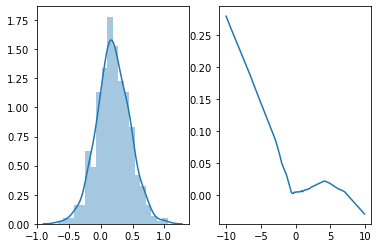

[Epoch 504/5000] [D loss: -9.110402] [G loss: -0.003556]
[Epoch 510/5000] [D loss: -9.067349] [G loss: -0.003980]
[Epoch 516/5000] [D loss: -9.090855] [G loss: -0.003593]
[Epoch 522/5000] [D loss: -9.201755] [G loss: -0.003805]
[Epoch 528/5000] [D loss: -9.294048] [G loss: -0.004791]
[Epoch 534/5000] [D loss: -8.820955] [G loss: -0.003575]
[Epoch 540/5000] [D loss: -9.046707] [G loss: -0.003442]
[Epoch 546/5000] [D loss: -9.467404] [G loss: -0.005139]
[Epoch 552/5000] [D loss: -9.205558] [G loss: -0.003462]
[Epoch 558/5000] [D loss: -9.301004] [G loss: -0.003529]
[Epoch 564/5000] [D loss: -8.783780] [G loss: -0.001969]
[Epoch 570/5000] [D loss: -9.111199] [G loss: -0.001465]
[Epoch 576/5000] [D loss: -9.078797] [G loss: -0.002749]
[Epoch 582/5000] [D loss: -9.128996] [G loss: -0.002826]
[Epoch 588/5000] [D loss: -9.238672] [G loss: -0.005004]
[Epoch 594/5000] [D loss: -9.015844] [G loss: -0.004237]
[Epoch 600/5000] [D loss: -9.248169] [G loss: -0.002177]


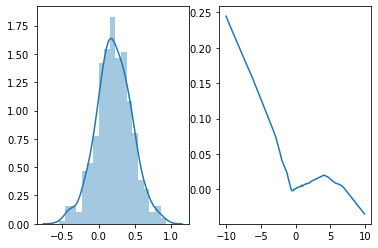

[Epoch 606/5000] [D loss: -9.213306] [G loss: -0.003551]
[Epoch 612/5000] [D loss: -9.314256] [G loss: -0.003600]
[Epoch 618/5000] [D loss: -9.242203] [G loss: -0.004744]
[Epoch 624/5000] [D loss: -8.802907] [G loss: -0.003208]
[Epoch 630/5000] [D loss: -9.045621] [G loss: -0.002469]
[Epoch 636/5000] [D loss: -9.197847] [G loss: -0.003718]
[Epoch 642/5000] [D loss: -7.593867] [G loss: 0.004250]
[Epoch 648/5000] [D loss: -6.878121] [G loss: 0.001147]
[Epoch 654/5000] [D loss: -6.336023] [G loss: -0.004156]
[Epoch 660/5000] [D loss: -7.827653] [G loss: 0.004175]
[Epoch 666/5000] [D loss: -6.221010] [G loss: -0.003810]
[Epoch 672/5000] [D loss: -7.942172] [G loss: 0.002701]
[Epoch 678/5000] [D loss: -6.011186] [G loss: -0.002309]
[Epoch 684/5000] [D loss: -9.720556] [G loss: 0.007948]
[Epoch 690/5000] [D loss: -9.108289] [G loss: 0.006516]
[Epoch 696/5000] [D loss: -9.179514] [G loss: 0.004407]


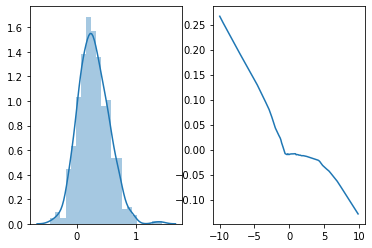

[Epoch 702/5000] [D loss: -8.937140] [G loss: -0.007517]
[Epoch 708/5000] [D loss: -7.667677] [G loss: 0.007590]
[Epoch 714/5000] [D loss: -7.658993] [G loss: 0.004259]
[Epoch 720/5000] [D loss: -9.227657] [G loss: -0.000261]
[Epoch 726/5000] [D loss: -9.510401] [G loss: -0.002484]
[Epoch 732/5000] [D loss: -9.449853] [G loss: -0.003700]
[Epoch 738/5000] [D loss: -9.478020] [G loss: -0.003855]
[Epoch 744/5000] [D loss: -9.385203] [G loss: -0.003000]
[Epoch 750/5000] [D loss: -9.536344] [G loss: -0.003678]
[Epoch 756/5000] [D loss: -9.606554] [G loss: -0.003517]
[Epoch 762/5000] [D loss: -9.037803] [G loss: -0.004298]
[Epoch 768/5000] [D loss: -9.016245] [G loss: -0.002939]
[Epoch 774/5000] [D loss: -9.090510] [G loss: -0.003058]
[Epoch 780/5000] [D loss: -9.247913] [G loss: -0.004015]
[Epoch 786/5000] [D loss: -9.091293] [G loss: -0.002931]
[Epoch 792/5000] [D loss: -9.310161] [G loss: -0.003001]
[Epoch 798/5000] [D loss: -9.447973] [G loss: -0.003472]


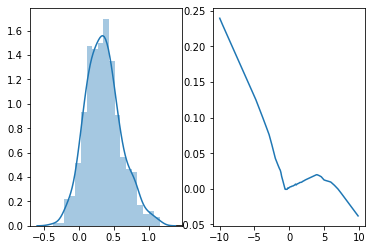

[Epoch 804/5000] [D loss: -9.421777] [G loss: -0.004524]
[Epoch 810/5000] [D loss: -9.155601] [G loss: -0.003533]
[Epoch 816/5000] [D loss: -9.598242] [G loss: -0.002089]
[Epoch 822/5000] [D loss: -9.330124] [G loss: -0.003632]
[Epoch 828/5000] [D loss: -9.109761] [G loss: -0.003675]
[Epoch 834/5000] [D loss: -9.077494] [G loss: -0.001948]
[Epoch 840/5000] [D loss: -9.135553] [G loss: -0.003156]
[Epoch 846/5000] [D loss: -9.111468] [G loss: -0.004007]
[Epoch 852/5000] [D loss: -9.149276] [G loss: -0.002758]
[Epoch 858/5000] [D loss: -9.375569] [G loss: -0.003237]
[Epoch 864/5000] [D loss: -9.587119] [G loss: -0.003051]
[Epoch 870/5000] [D loss: -6.002270] [G loss: 0.002659]
[Epoch 876/5000] [D loss: -7.613043] [G loss: -0.001616]
[Epoch 882/5000] [D loss: -6.506587] [G loss: 0.003834]
[Epoch 888/5000] [D loss: -7.591613] [G loss: -0.002402]
[Epoch 894/5000] [D loss: -6.482215] [G loss: 0.003555]
[Epoch 900/5000] [D loss: -7.694627] [G loss: -0.001397]


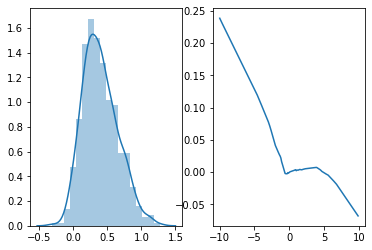

[Epoch 906/5000] [D loss: -7.311563] [G loss: 0.003654]
[Epoch 912/5000] [D loss: -6.525713] [G loss: -0.003684]
[Epoch 918/5000] [D loss: -7.802233] [G loss: 0.002166]
[Epoch 924/5000] [D loss: -6.234212] [G loss: -0.003120]
[Epoch 930/5000] [D loss: -7.846222] [G loss: 0.001145]
[Epoch 936/5000] [D loss: -6.252803] [G loss: -0.003969]
[Epoch 942/5000] [D loss: -8.085707] [G loss: 0.002156]
[Epoch 948/5000] [D loss: -6.261101] [G loss: -0.003662]
[Epoch 954/5000] [D loss: -8.066261] [G loss: 0.001256]
[Epoch 960/5000] [D loss: -6.348039] [G loss: -0.004278]
[Epoch 966/5000] [D loss: -8.273891] [G loss: 0.001618]
[Epoch 972/5000] [D loss: -6.420200] [G loss: -0.004366]
[Epoch 978/5000] [D loss: -8.040565] [G loss: 0.002483]
[Epoch 984/5000] [D loss: -6.350045] [G loss: -0.004301]
[Epoch 990/5000] [D loss: -8.105879] [G loss: 0.001169]
[Epoch 996/5000] [D loss: -6.641988] [G loss: -0.002931]


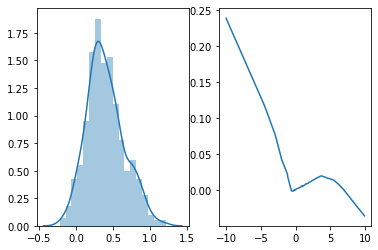

[Epoch 1002/5000] [D loss: -8.004172] [G loss: 0.002020]
[Epoch 1008/5000] [D loss: -6.251038] [G loss: -0.004451]
[Epoch 1014/5000] [D loss: -8.200413] [G loss: 0.000909]
[Epoch 1020/5000] [D loss: -6.376338] [G loss: -0.002837]
[Epoch 1026/5000] [D loss: -8.157429] [G loss: 0.001600]
[Epoch 1032/5000] [D loss: -6.413192] [G loss: -0.004234]
[Epoch 1038/5000] [D loss: -8.128831] [G loss: 0.001851]
[Epoch 1044/5000] [D loss: -6.262724] [G loss: -0.004433]
[Epoch 1050/5000] [D loss: -8.324152] [G loss: 0.001366]
[Epoch 1056/5000] [D loss: -6.683204] [G loss: -0.004135]
[Epoch 1062/5000] [D loss: -8.208699] [G loss: 0.001222]
[Epoch 1068/5000] [D loss: -6.443338] [G loss: -0.003430]
[Epoch 1074/5000] [D loss: -8.186397] [G loss: 0.002289]
[Epoch 1080/5000] [D loss: -6.374240] [G loss: -0.003981]
[Epoch 1086/5000] [D loss: -8.224700] [G loss: 0.001222]
[Epoch 1092/5000] [D loss: -8.304540] [G loss: -0.000479]
[Epoch 1098/5000] [D loss: -8.924353] [G loss: 0.001153]


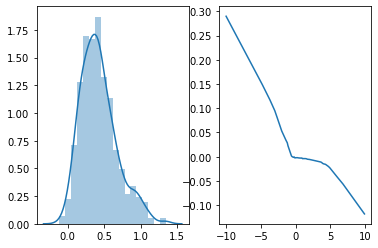

[Epoch 1104/5000] [D loss: -8.812321] [G loss: 0.002191]
[Epoch 1110/5000] [D loss: -8.756240] [G loss: 0.003024]
[Epoch 1116/5000] [D loss: -8.442002] [G loss: 0.001236]
[Epoch 1122/5000] [D loss: -8.455667] [G loss: 0.002800]
[Epoch 1128/5000] [D loss: -8.551071] [G loss: 0.001564]
[Epoch 1134/5000] [D loss: -8.543006] [G loss: 0.002084]
[Epoch 1140/5000] [D loss: -8.446553] [G loss: 0.001306]
[Epoch 1146/5000] [D loss: -8.286901] [G loss: 0.001471]
[Epoch 1152/5000] [D loss: -8.424765] [G loss: 0.001318]
[Epoch 1158/5000] [D loss: -8.348434] [G loss: 0.001501]
[Epoch 1164/5000] [D loss: -8.494420] [G loss: 0.001812]
[Epoch 1170/5000] [D loss: -8.511339] [G loss: 0.002141]
[Epoch 1176/5000] [D loss: -8.364477] [G loss: 0.001468]
[Epoch 1182/5000] [D loss: -8.104503] [G loss: 0.001167]
[Epoch 1188/5000] [D loss: -8.167654] [G loss: 0.001668]
[Epoch 1194/5000] [D loss: -8.565326] [G loss: 0.002127]
[Epoch 1200/5000] [D loss: -8.261311] [G loss: 0.001462]


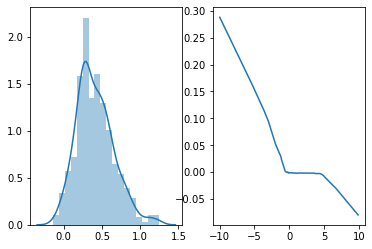

[Epoch 1206/5000] [D loss: -8.211040] [G loss: 0.001488]
[Epoch 1212/5000] [D loss: -9.867262] [G loss: 0.004781]
[Epoch 1218/5000] [D loss: -8.660171] [G loss: 0.003540]
[Epoch 1224/5000] [D loss: -8.281917] [G loss: 0.001434]
[Epoch 1230/5000] [D loss: -8.206239] [G loss: 0.000824]
[Epoch 1236/5000] [D loss: -8.139288] [G loss: 0.001787]
[Epoch 1242/5000] [D loss: -8.901039] [G loss: 0.002883]
[Epoch 1248/5000] [D loss: -8.869940] [G loss: 0.002521]
[Epoch 1254/5000] [D loss: -8.609630] [G loss: 0.002003]
[Epoch 1260/5000] [D loss: -8.738402] [G loss: 0.002094]
[Epoch 1266/5000] [D loss: -8.618420] [G loss: 0.001699]
[Epoch 1272/5000] [D loss: -8.246513] [G loss: 0.002671]
[Epoch 1278/5000] [D loss: -8.343620] [G loss: -0.007418]
[Epoch 1284/5000] [D loss: -8.756968] [G loss: 0.004931]
[Epoch 1290/5000] [D loss: -8.666376] [G loss: -0.005494]
[Epoch 1296/5000] [D loss: -8.409709] [G loss: 0.005571]


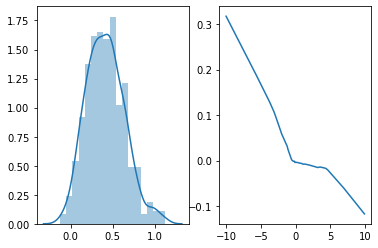

[Epoch 1302/5000] [D loss: -9.161626] [G loss: -0.006338]
[Epoch 1308/5000] [D loss: -8.135802] [G loss: 0.005828]
[Epoch 1314/5000] [D loss: -9.539817] [G loss: -0.007519]
[Epoch 1320/5000] [D loss: -8.259229] [G loss: 0.005452]
[Epoch 1326/5000] [D loss: -9.144083] [G loss: -0.006664]
[Epoch 1332/5000] [D loss: -8.226368] [G loss: 0.004938]
[Epoch 1338/5000] [D loss: -9.753862] [G loss: -0.005880]
[Epoch 1344/5000] [D loss: -8.785582] [G loss: 0.005013]
[Epoch 1350/5000] [D loss: -8.905037] [G loss: -0.004320]
[Epoch 1356/5000] [D loss: -8.618157] [G loss: 0.005914]
[Epoch 1362/5000] [D loss: -9.453875] [G loss: -0.004489]
[Epoch 1368/5000] [D loss: -8.003389] [G loss: 0.004523]
[Epoch 1374/5000] [D loss: -9.497132] [G loss: -0.006554]
[Epoch 1380/5000] [D loss: -7.987912] [G loss: 0.004702]
[Epoch 1386/5000] [D loss: -9.278185] [G loss: -0.006041]
[Epoch 1392/5000] [D loss: -8.161737] [G loss: 0.005097]
[Epoch 1398/5000] [D loss: -9.338327] [G loss: -0.005762]


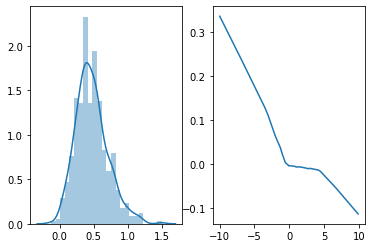

[Epoch 1404/5000] [D loss: -8.194992] [G loss: 0.003920]
[Epoch 1410/5000] [D loss: -9.634708] [G loss: -0.006377]
[Epoch 1416/5000] [D loss: -8.213717] [G loss: 0.003702]
[Epoch 1422/5000] [D loss: -9.306783] [G loss: -0.005678]
[Epoch 1428/5000] [D loss: -8.281032] [G loss: 0.003556]
[Epoch 1434/5000] [D loss: -9.420543] [G loss: -0.005994]
[Epoch 1440/5000] [D loss: -8.253675] [G loss: 0.003619]
[Epoch 1446/5000] [D loss: -9.697601] [G loss: -0.005988]
[Epoch 1452/5000] [D loss: -8.496590] [G loss: 0.004453]
[Epoch 1458/5000] [D loss: -9.444777] [G loss: -0.005733]
[Epoch 1464/5000] [D loss: -8.376989] [G loss: 0.004789]
[Epoch 1470/5000] [D loss: -9.240509] [G loss: -0.005509]
[Epoch 1476/5000] [D loss: -8.182281] [G loss: 0.004120]
[Epoch 1482/5000] [D loss: -9.782763] [G loss: -0.003986]
[Epoch 1488/5000] [D loss: -8.596249] [G loss: -0.001446]
[Epoch 1494/5000] [D loss: -8.631083] [G loss: -0.001207]
[Epoch 1500/5000] [D loss: -8.845495] [G loss: -0.001691]


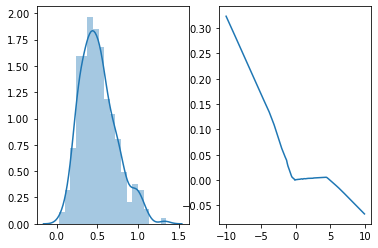

[Epoch 1506/5000] [D loss: -9.161924] [G loss: -0.001816]
[Epoch 1512/5000] [D loss: -9.376257] [G loss: -0.002502]
[Epoch 1518/5000] [D loss: -9.253510] [G loss: -0.001964]
[Epoch 1524/5000] [D loss: -9.523520] [G loss: -0.002760]
[Epoch 1530/5000] [D loss: -9.533856] [G loss: -0.002037]
[Epoch 1536/5000] [D loss: -9.641420] [G loss: -0.003313]
[Epoch 1542/5000] [D loss: -9.699902] [G loss: -0.002717]
[Epoch 1548/5000] [D loss: -9.672763] [G loss: -0.002978]
[Epoch 1554/5000] [D loss: -9.792131] [G loss: -0.002767]
[Epoch 1560/5000] [D loss: -9.773043] [G loss: -0.003133]
[Epoch 1566/5000] [D loss: -9.339798] [G loss: -0.002646]
[Epoch 1572/5000] [D loss: -9.300501] [G loss: -0.002007]
[Epoch 1578/5000] [D loss: -9.518278] [G loss: -0.002044]
[Epoch 1584/5000] [D loss: -9.655508] [G loss: -0.002710]
[Epoch 1590/5000] [D loss: -9.722857] [G loss: -0.003184]
[Epoch 1596/5000] [D loss: -9.676893] [G loss: -0.002900]


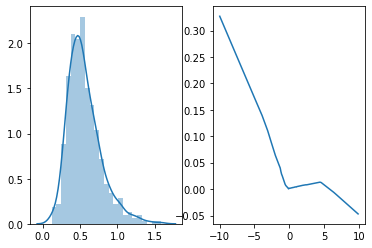

[Epoch 1602/5000] [D loss: -9.628872] [G loss: -0.002875]
[Epoch 1608/5000] [D loss: -9.606913] [G loss: -0.003224]
[Epoch 1614/5000] [D loss: -9.617540] [G loss: -0.003114]
[Epoch 1620/5000] [D loss: -9.732361] [G loss: -0.002514]
[Epoch 1626/5000] [D loss: -9.706464] [G loss: -0.003404]
[Epoch 1632/5000] [D loss: -9.591992] [G loss: -0.002950]
[Epoch 1638/5000] [D loss: -9.830484] [G loss: -0.002631]
[Epoch 1644/5000] [D loss: -9.610542] [G loss: -0.003017]
[Epoch 1650/5000] [D loss: -9.728931] [G loss: -0.002835]
[Epoch 1656/5000] [D loss: -9.636612] [G loss: -0.003228]
[Epoch 1662/5000] [D loss: -9.659528] [G loss: -0.002819]
[Epoch 1668/5000] [D loss: -9.716232] [G loss: -0.003459]
[Epoch 1674/5000] [D loss: -9.775474] [G loss: -0.003042]
[Epoch 1680/5000] [D loss: -9.693301] [G loss: -0.003297]
[Epoch 1686/5000] [D loss: -9.555128] [G loss: -0.003220]
[Epoch 1692/5000] [D loss: -9.558764] [G loss: -0.002617]
[Epoch 1698/5000] [D loss: -9.764795] [G loss: -0.003007]


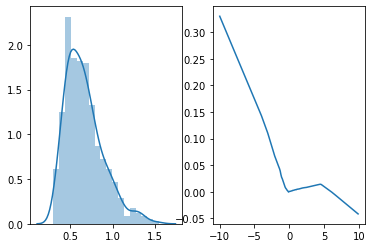

[Epoch 1704/5000] [D loss: -9.770950] [G loss: -0.003154]
[Epoch 1710/5000] [D loss: -9.625227] [G loss: -0.003414]
[Epoch 1716/5000] [D loss: -9.503675] [G loss: -0.002805]
[Epoch 1722/5000] [D loss: -9.645451] [G loss: -0.002984]
[Epoch 1728/5000] [D loss: -9.814976] [G loss: -0.003151]
[Epoch 1734/5000] [D loss: -9.743139] [G loss: -0.003584]
[Epoch 1740/5000] [D loss: -9.733949] [G loss: -0.003419]
[Epoch 1746/5000] [D loss: -9.684053] [G loss: -0.003497]
[Epoch 1752/5000] [D loss: -9.706068] [G loss: -0.003266]
[Epoch 1758/5000] [D loss: -9.718380] [G loss: -0.003508]
[Epoch 1764/5000] [D loss: -9.645587] [G loss: -0.003407]
[Epoch 1770/5000] [D loss: -9.660413] [G loss: -0.003144]
[Epoch 1776/5000] [D loss: -9.633603] [G loss: -0.003258]
[Epoch 1782/5000] [D loss: -9.777984] [G loss: -0.003443]
[Epoch 1788/5000] [D loss: -8.864787] [G loss: -0.001860]
[Epoch 1794/5000] [D loss: -8.896864] [G loss: -0.001407]
[Epoch 1800/5000] [D loss: -9.181729] [G loss: -0.001936]


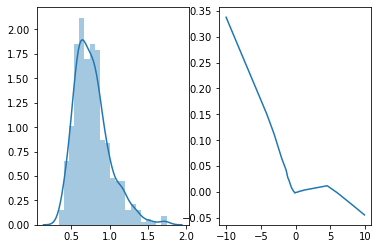

[Epoch 1806/5000] [D loss: -9.322421] [G loss: -0.002614]
[Epoch 1812/5000] [D loss: -9.713826] [G loss: -0.002993]
[Epoch 1818/5000] [D loss: -9.770693] [G loss: -0.003438]
[Epoch 1824/5000] [D loss: -9.743114] [G loss: -0.003765]
[Epoch 1830/5000] [D loss: -9.818191] [G loss: -0.003832]
[Epoch 1836/5000] [D loss: -9.830552] [G loss: -0.003919]
[Epoch 1842/5000] [D loss: -9.664076] [G loss: -0.003595]
[Epoch 1848/5000] [D loss: -9.796317] [G loss: -0.003797]
[Epoch 1854/5000] [D loss: -9.637610] [G loss: -0.003624]
[Epoch 1860/5000] [D loss: -9.736533] [G loss: -0.003726]
[Epoch 1866/5000] [D loss: -9.710821] [G loss: -0.003714]
[Epoch 1872/5000] [D loss: -9.643826] [G loss: -0.003645]
[Epoch 1878/5000] [D loss: -9.647573] [G loss: -0.003683]
[Epoch 1884/5000] [D loss: -9.692173] [G loss: -0.003831]
[Epoch 1890/5000] [D loss: -9.729378] [G loss: -0.003960]
[Epoch 1896/5000] [D loss: -9.565550] [G loss: -0.003769]


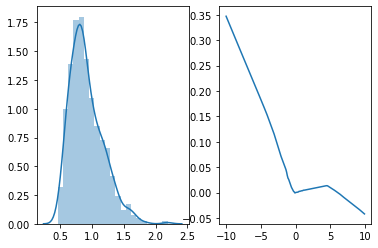

[Epoch 1902/5000] [D loss: -9.600116] [G loss: -0.003663]
[Epoch 1908/5000] [D loss: -9.799133] [G loss: -0.004009]
[Epoch 1914/5000] [D loss: -9.760783] [G loss: -0.004136]
[Epoch 1920/5000] [D loss: -9.652980] [G loss: -0.003869]
[Epoch 1926/5000] [D loss: -9.684355] [G loss: -0.003727]
[Epoch 1932/5000] [D loss: -9.722987] [G loss: -0.004022]
[Epoch 1938/5000] [D loss: -9.742505] [G loss: -0.004175]
[Epoch 1944/5000] [D loss: -9.715934] [G loss: -0.004083]
[Epoch 1950/5000] [D loss: -9.698937] [G loss: -0.004321]
[Epoch 1956/5000] [D loss: -9.927095] [G loss: -0.003586]
[Epoch 1962/5000] [D loss: -9.185251] [G loss: -0.002867]
[Epoch 1968/5000] [D loss: -9.468707] [G loss: -0.003305]
[Epoch 1974/5000] [D loss: -9.475401] [G loss: -0.003618]
[Epoch 1980/5000] [D loss: -9.525417] [G loss: -0.003803]
[Epoch 1986/5000] [D loss: -9.553830] [G loss: -0.003881]
[Epoch 1992/5000] [D loss: -9.579287] [G loss: -0.004001]
[Epoch 1998/5000] [D loss: -9.668582] [G loss: -0.004145]


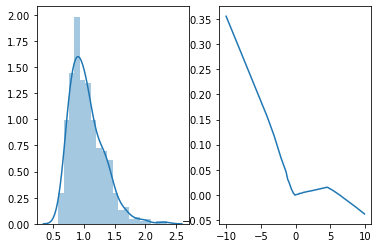

[Epoch 2004/5000] [D loss: -9.605252] [G loss: -0.004277]
[Epoch 2010/5000] [D loss: -9.581904] [G loss: -0.004165]
[Epoch 2016/5000] [D loss: -9.816159] [G loss: -0.004324]
[Epoch 2022/5000] [D loss: -9.855313] [G loss: -0.004714]
[Epoch 2028/5000] [D loss: -9.777935] [G loss: -0.004604]
[Epoch 2034/5000] [D loss: -9.827181] [G loss: -0.004792]
[Epoch 2040/5000] [D loss: -9.863819] [G loss: -0.004824]
[Epoch 2046/5000] [D loss: -9.684589] [G loss: -0.004630]
[Epoch 2052/5000] [D loss: -9.927558] [G loss: -0.004199]
[Epoch 2058/5000] [D loss: -9.341411] [G loss: -0.003521]
[Epoch 2064/5000] [D loss: -9.258212] [G loss: -0.003503]
[Epoch 2070/5000] [D loss: -9.367848] [G loss: -0.003727]
[Epoch 2076/5000] [D loss: -9.604508] [G loss: -0.004161]
[Epoch 2082/5000] [D loss: -9.543066] [G loss: -0.004216]
[Epoch 2088/5000] [D loss: -9.840357] [G loss: -0.004803]
[Epoch 2094/5000] [D loss: -9.818298] [G loss: -0.004933]
[Epoch 2100/5000] [D loss: -9.743674] [G loss: -0.004895]


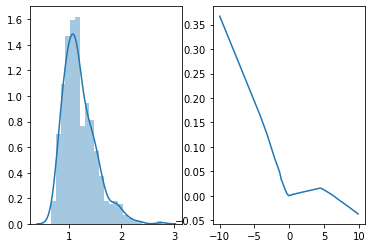

[Epoch 2106/5000] [D loss: -9.759539] [G loss: -0.004918]
[Epoch 2112/5000] [D loss: -9.771411] [G loss: -0.005065]
[Epoch 2118/5000] [D loss: -9.766395] [G loss: -0.004985]
[Epoch 2124/5000] [D loss: -9.739156] [G loss: -0.005001]
[Epoch 2130/5000] [D loss: -9.918215] [G loss: -0.004984]
[Epoch 2136/5000] [D loss: -9.671133] [G loss: -0.004807]
[Epoch 2142/5000] [D loss: -9.440462] [G loss: -0.004599]
[Epoch 2148/5000] [D loss: -9.717296] [G loss: -0.004998]
[Epoch 2154/5000] [D loss: -9.696177] [G loss: -0.005005]
[Epoch 2160/5000] [D loss: -9.809003] [G loss: -0.005410]
[Epoch 2166/5000] [D loss: -9.778233] [G loss: -0.005342]
[Epoch 2172/5000] [D loss: -8.792466] [G loss: 0.000559]
[Epoch 2178/5000] [D loss: -8.873151] [G loss: 0.002188]
[Epoch 2184/5000] [D loss: -9.066702] [G loss: 0.002827]
[Epoch 2190/5000] [D loss: -9.080952] [G loss: 0.002995]
[Epoch 2196/5000] [D loss: -8.860965] [G loss: 0.002626]


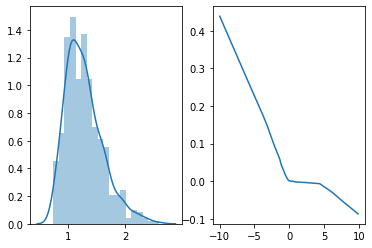

[Epoch 2202/5000] [D loss: -8.740018] [G loss: 0.002086]
[Epoch 2208/5000] [D loss: -8.594003] [G loss: 0.001643]
[Epoch 2214/5000] [D loss: -8.313354] [G loss: 0.001249]
[Epoch 2220/5000] [D loss: -8.583825] [G loss: 0.001459]
[Epoch 2226/5000] [D loss: -8.600764] [G loss: 0.001531]
[Epoch 2232/5000] [D loss: -8.537521] [G loss: 0.001556]
[Epoch 2238/5000] [D loss: -8.532488] [G loss: 0.001465]
[Epoch 2244/5000] [D loss: -8.270211] [G loss: 0.001017]
[Epoch 2250/5000] [D loss: -8.386415] [G loss: 0.000932]
[Epoch 2256/5000] [D loss: -8.351650] [G loss: 0.000799]
[Epoch 2262/5000] [D loss: -8.206870] [G loss: 0.000601]
[Epoch 2268/5000] [D loss: -8.291993] [G loss: 0.000657]
[Epoch 2274/5000] [D loss: -8.310783] [G loss: 0.000766]
[Epoch 2280/5000] [D loss: -8.540048] [G loss: 0.001233]
[Epoch 2286/5000] [D loss: -8.386735] [G loss: 0.001014]
[Epoch 2292/5000] [D loss: -8.422710] [G loss: 0.000904]
[Epoch 2298/5000] [D loss: -8.323306] [G loss: 0.000548]


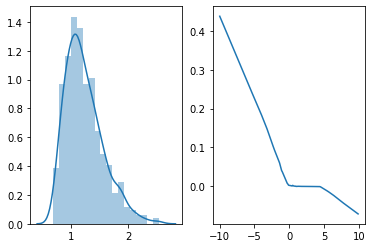

[Epoch 2304/5000] [D loss: -8.330843] [G loss: 0.000547]
[Epoch 2310/5000] [D loss: -8.296772] [G loss: 0.000599]
[Epoch 2316/5000] [D loss: -8.287683] [G loss: 0.000436]
[Epoch 2322/5000] [D loss: -8.322040] [G loss: 0.000711]
[Epoch 2328/5000] [D loss: -8.447557] [G loss: 0.000779]
[Epoch 2334/5000] [D loss: -8.417455] [G loss: 0.000656]
[Epoch 2340/5000] [D loss: -8.315950] [G loss: 0.000471]
[Epoch 2346/5000] [D loss: -8.287274] [G loss: 0.000558]
[Epoch 2352/5000] [D loss: -8.246571] [G loss: 0.000390]
[Epoch 2358/5000] [D loss: -8.341471] [G loss: 0.000743]
[Epoch 2364/5000] [D loss: -8.288077] [G loss: 0.000484]
[Epoch 2370/5000] [D loss: -8.268132] [G loss: 0.000398]
[Epoch 2376/5000] [D loss: -8.371045] [G loss: 0.000581]
[Epoch 2382/5000] [D loss: -8.401078] [G loss: 0.000611]
[Epoch 2388/5000] [D loss: -8.350039] [G loss: 0.000503]
[Epoch 2394/5000] [D loss: -8.317392] [G loss: 0.000376]
[Epoch 2400/5000] [D loss: -8.353913] [G loss: 0.000555]


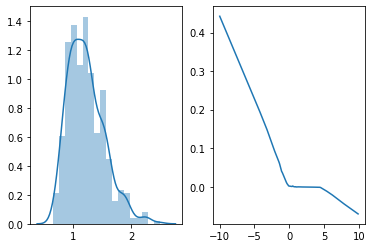

[Epoch 2406/5000] [D loss: -8.447443] [G loss: 0.000836]
[Epoch 2412/5000] [D loss: -8.486176] [G loss: 0.000929]
[Epoch 2418/5000] [D loss: -8.577354] [G loss: 0.001182]
[Epoch 2424/5000] [D loss: -8.800076] [G loss: 0.001604]
[Epoch 2430/5000] [D loss: -8.723141] [G loss: 0.001598]
[Epoch 2436/5000] [D loss: -8.746997] [G loss: 0.001504]
[Epoch 2442/5000] [D loss: -8.593554] [G loss: 0.001244]
[Epoch 2448/5000] [D loss: -8.419405] [G loss: 0.000740]
[Epoch 2454/5000] [D loss: -8.383993] [G loss: 0.000459]
[Epoch 2460/5000] [D loss: -8.370384] [G loss: 0.000348]
[Epoch 2466/5000] [D loss: -9.281926] [G loss: 0.002808]
[Epoch 2472/5000] [D loss: -9.429428] [G loss: 0.003200]
[Epoch 2478/5000] [D loss: -9.341345] [G loss: 0.003146]
[Epoch 2484/5000] [D loss: -9.156590] [G loss: 0.002785]
[Epoch 2490/5000] [D loss: -9.064720] [G loss: 0.002468]
[Epoch 2496/5000] [D loss: -9.118311] [G loss: 0.002416]


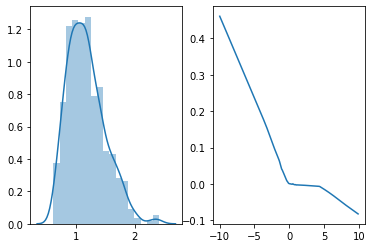

[Epoch 2502/5000] [D loss: -8.982242] [G loss: 0.002195]
[Epoch 2508/5000] [D loss: -8.813158] [G loss: 0.001770]
[Epoch 2514/5000] [D loss: -8.970258] [G loss: 0.001781]
[Epoch 2520/5000] [D loss: -8.924219] [G loss: 0.001870]
[Epoch 2526/5000] [D loss: -8.894902] [G loss: 0.001758]
[Epoch 2532/5000] [D loss: -8.970473] [G loss: 0.001776]
[Epoch 2538/5000] [D loss: -8.819772] [G loss: 0.001515]
[Epoch 2544/5000] [D loss: -8.639585] [G loss: 0.000980]
[Epoch 2550/5000] [D loss: -8.857042] [G loss: 0.001541]
[Epoch 2556/5000] [D loss: -8.773341] [G loss: 0.001411]
[Epoch 2562/5000] [D loss: -8.662823] [G loss: 0.001050]
[Epoch 2568/5000] [D loss: -8.611085] [G loss: 0.000805]
[Epoch 2574/5000] [D loss: -8.641611] [G loss: 0.000895]
[Epoch 2580/5000] [D loss: -8.560018] [G loss: 0.000654]
[Epoch 2586/5000] [D loss: -8.600082] [G loss: 0.000748]
[Epoch 2592/5000] [D loss: -8.550710] [G loss: 0.000531]
[Epoch 2598/5000] [D loss: -8.656669] [G loss: 0.000760]


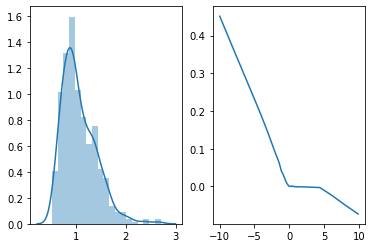

[Epoch 2604/5000] [D loss: -8.584368] [G loss: 0.000731]
[Epoch 2610/5000] [D loss: -8.574759] [G loss: 0.000532]
[Epoch 2616/5000] [D loss: -8.620103] [G loss: 0.000647]
[Epoch 2622/5000] [D loss: -8.629035] [G loss: 0.000626]
[Epoch 2628/5000] [D loss: -8.559798] [G loss: 0.000515]
[Epoch 2634/5000] [D loss: -8.690360] [G loss: 0.000791]
[Epoch 2640/5000] [D loss: -8.594895] [G loss: 0.000556]
[Epoch 2646/5000] [D loss: -8.671906] [G loss: 0.001115]
[Epoch 2652/5000] [D loss: -8.851553] [G loss: 0.001381]
[Epoch 2658/5000] [D loss: -8.740675] [G loss: 0.001019]
[Epoch 2664/5000] [D loss: -8.746241] [G loss: 0.000884]
[Epoch 2670/5000] [D loss: -8.536407] [G loss: 0.000665]
[Epoch 2676/5000] [D loss: -8.613756] [G loss: 0.000580]
[Epoch 2682/5000] [D loss: -8.541540] [G loss: 0.000456]
[Epoch 2688/5000] [D loss: -8.564081] [G loss: 0.000543]
[Epoch 2694/5000] [D loss: -8.880170] [G loss: 0.001082]
[Epoch 2700/5000] [D loss: -8.663136] [G loss: 0.000828]


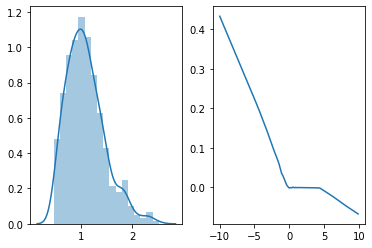

[Epoch 2706/5000] [D loss: -8.658708] [G loss: 0.000722]
[Epoch 2712/5000] [D loss: -9.353738] [G loss: -0.005203]
[Epoch 2718/5000] [D loss: -8.858152] [G loss: -0.002752]
[Epoch 2724/5000] [D loss: -9.333936] [G loss: -0.002597]
[Epoch 2730/5000] [D loss: -9.246330] [G loss: -0.002295]
[Epoch 2736/5000] [D loss: -9.497196] [G loss: -0.002711]
[Epoch 2742/5000] [D loss: -9.501863] [G loss: -0.002974]
[Epoch 2748/5000] [D loss: -9.760483] [G loss: -0.003359]
[Epoch 2754/5000] [D loss: -9.722806] [G loss: -0.003561]
[Epoch 2760/5000] [D loss: -9.623422] [G loss: -0.003380]
[Epoch 2766/5000] [D loss: -9.740552] [G loss: -0.003616]
[Epoch 2772/5000] [D loss: -9.667095] [G loss: -0.003521]
[Epoch 2778/5000] [D loss: -9.644295] [G loss: -0.003571]
[Epoch 2784/5000] [D loss: -9.619867] [G loss: -0.003399]
[Epoch 2790/5000] [D loss: -9.744842] [G loss: -0.003751]
[Epoch 2796/5000] [D loss: -9.829990] [G loss: -0.003854]


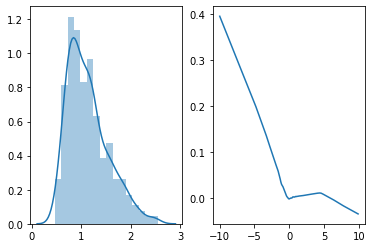

[Epoch 2802/5000] [D loss: -9.715108] [G loss: -0.003820]
[Epoch 2808/5000] [D loss: -9.839458] [G loss: -0.004039]
[Epoch 2814/5000] [D loss: -9.829000] [G loss: -0.004032]
[Epoch 2820/5000] [D loss: -9.815289] [G loss: -0.003954]
[Epoch 2826/5000] [D loss: -9.892153] [G loss: -0.004185]
[Epoch 2832/5000] [D loss: -9.831957] [G loss: -0.004098]
[Epoch 2838/5000] [D loss: -9.843799] [G loss: -0.003959]
[Epoch 2844/5000] [D loss: -9.935849] [G loss: -0.003858]
[Epoch 2850/5000] [D loss: -9.503437] [G loss: -0.003475]
[Epoch 2856/5000] [D loss: -9.823349] [G loss: -0.004052]
[Epoch 2862/5000] [D loss: -9.736865] [G loss: -0.003968]
[Epoch 2868/5000] [D loss: -9.863435] [G loss: -0.004227]
[Epoch 2874/5000] [D loss: -9.931525] [G loss: -0.004042]
[Epoch 2880/5000] [D loss: -9.599627] [G loss: -0.003524]
[Epoch 2886/5000] [D loss: -9.591789] [G loss: -0.003595]
[Epoch 2892/5000] [D loss: -9.526546] [G loss: -0.003429]
[Epoch 2898/5000] [D loss: -9.660942] [G loss: -0.003768]


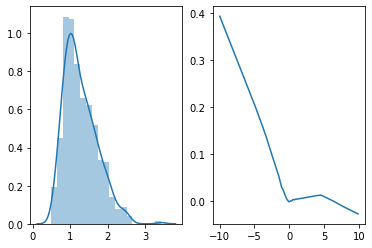

[Epoch 2904/5000] [D loss: -9.875781] [G loss: -0.004307]
[Epoch 2910/5000] [D loss: -9.885701] [G loss: -0.004426]
[Epoch 2916/5000] [D loss: -9.781512] [G loss: -0.004147]
[Epoch 2922/5000] [D loss: -9.870053] [G loss: -0.004263]
[Epoch 2928/5000] [D loss: -9.619772] [G loss: -0.003929]
[Epoch 2934/5000] [D loss: -9.780808] [G loss: -0.004250]
[Epoch 2940/5000] [D loss: -9.667102] [G loss: -0.004079]
[Epoch 2946/5000] [D loss: -9.865531] [G loss: -0.004488]
[Epoch 2952/5000] [D loss: -9.853263] [G loss: -0.004576]
[Epoch 2958/5000] [D loss: -9.703016] [G loss: -0.004337]
[Epoch 2964/5000] [D loss: -9.806969] [G loss: -0.004395]
[Epoch 2970/5000] [D loss: -9.707944] [G loss: -0.004108]
[Epoch 2976/5000] [D loss: -9.568161] [G loss: -0.003926]
[Epoch 2982/5000] [D loss: -9.446737] [G loss: -0.003574]
[Epoch 2988/5000] [D loss: -9.668963] [G loss: -0.004040]
[Epoch 2994/5000] [D loss: -9.726399] [G loss: -0.004220]
[Epoch 3000/5000] [D loss: -9.659988] [G loss: -0.004315]


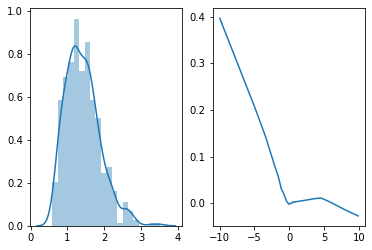

[Epoch 3006/5000] [D loss: -9.698859] [G loss: -0.004312]
[Epoch 3012/5000] [D loss: -9.937613] [G loss: -0.004552]
[Epoch 3018/5000] [D loss: -9.638170] [G loss: -0.004440]
[Epoch 3024/5000] [D loss: -9.785026] [G loss: -0.004592]
[Epoch 3030/5000] [D loss: -9.808780] [G loss: -0.004808]
[Epoch 3036/5000] [D loss: -9.926379] [G loss: -0.004918]
[Epoch 3042/5000] [D loss: -9.871381] [G loss: -0.004887]
[Epoch 3048/5000] [D loss: -9.819942] [G loss: -0.004606]
[Epoch 3054/5000] [D loss: -9.573240] [G loss: -0.004153]
[Epoch 3060/5000] [D loss: -9.632112] [G loss: -0.004519]
[Epoch 3066/5000] [D loss: -9.847169] [G loss: -0.004982]
[Epoch 3072/5000] [D loss: -9.792478] [G loss: -0.004860]
[Epoch 3078/5000] [D loss: -9.854303] [G loss: -0.005225]
[Epoch 3084/5000] [D loss: -9.865404] [G loss: -0.005136]
[Epoch 3090/5000] [D loss: -9.858137] [G loss: -0.004969]
[Epoch 3096/5000] [D loss: -9.805766] [G loss: -0.004770]


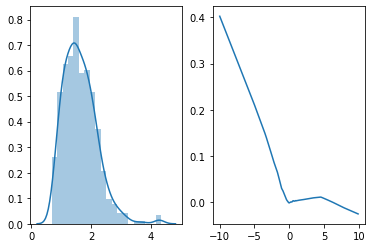

[Epoch 3102/5000] [D loss: -9.718063] [G loss: -0.004763]
[Epoch 3108/5000] [D loss: -9.788907] [G loss: -0.004963]
[Epoch 3114/5000] [D loss: -9.815348] [G loss: -0.005146]
[Epoch 3120/5000] [D loss: -9.778111] [G loss: -0.005119]
[Epoch 3126/5000] [D loss: -9.675144] [G loss: -0.004745]
[Epoch 3132/5000] [D loss: -9.736127] [G loss: -0.004924]
[Epoch 3138/5000] [D loss: -9.872887] [G loss: -0.005188]
[Epoch 3144/5000] [D loss: -9.789783] [G loss: -0.005189]
[Epoch 3150/5000] [D loss: -9.937176] [G loss: -0.005199]
[Epoch 3156/5000] [D loss: -9.727481] [G loss: -0.005118]
[Epoch 3162/5000] [D loss: -9.874203] [G loss: -0.005569]
[Epoch 3168/5000] [D loss: -9.899054] [G loss: -0.005650]
[Epoch 3174/5000] [D loss: -9.758488] [G loss: -0.005472]
[Epoch 3180/5000] [D loss: -9.756953] [G loss: -0.005159]
[Epoch 3186/5000] [D loss: -9.763254] [G loss: -0.005559]
[Epoch 3192/5000] [D loss: -9.851298] [G loss: -0.005603]
[Epoch 3198/5000] [D loss: -9.870023] [G loss: -0.005813]


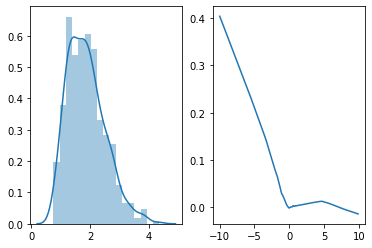

[Epoch 3204/5000] [D loss: -9.817478] [G loss: -0.005596]
[Epoch 3210/5000] [D loss: -9.809170] [G loss: -0.005579]
[Epoch 3216/5000] [D loss: -9.727189] [G loss: -0.005491]
[Epoch 3222/5000] [D loss: -9.675162] [G loss: -0.005219]
[Epoch 3228/5000] [D loss: -9.568673] [G loss: -0.004956]
[Epoch 3234/5000] [D loss: -9.478478] [G loss: -0.004736]
[Epoch 3240/5000] [D loss: -9.497746] [G loss: -0.004758]
[Epoch 3246/5000] [D loss: -9.400978] [G loss: -0.004702]
[Epoch 3252/5000] [D loss: -9.436440] [G loss: -0.004758]
[Epoch 3258/5000] [D loss: -9.405247] [G loss: -0.004606]
[Epoch 3264/5000] [D loss: -9.486113] [G loss: -0.004905]
[Epoch 3270/5000] [D loss: -9.572742] [G loss: -0.005113]
[Epoch 3276/5000] [D loss: -9.679548] [G loss: -0.005520]
[Epoch 3282/5000] [D loss: -9.528424] [G loss: -0.005221]
[Epoch 3288/5000] [D loss: -9.650937] [G loss: -0.005409]
[Epoch 3294/5000] [D loss: -9.626459] [G loss: -0.005091]
[Epoch 3300/5000] [D loss: -9.506402] [G loss: -0.005089]


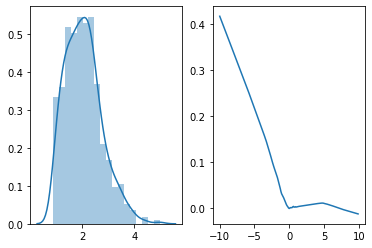

[Epoch 3306/5000] [D loss: -9.627206] [G loss: -0.005743]
[Epoch 3312/5000] [D loss: -9.753077] [G loss: -0.006081]
[Epoch 3318/5000] [D loss: -9.769416] [G loss: -0.006119]
[Epoch 3324/5000] [D loss: -9.818996] [G loss: -0.006256]
[Epoch 3330/5000] [D loss: -9.684449] [G loss: -0.005864]
[Epoch 3336/5000] [D loss: -9.699991] [G loss: -0.006307]
[Epoch 3342/5000] [D loss: -9.666580] [G loss: -0.006621]
[Epoch 3348/5000] [D loss: -9.706326] [G loss: -0.006030]
[Epoch 3354/5000] [D loss: -9.560682] [G loss: -0.006189]
[Epoch 3360/5000] [D loss: -9.790729] [G loss: -0.006538]
[Epoch 3366/5000] [D loss: -9.765045] [G loss: -0.006498]
[Epoch 3372/5000] [D loss: -9.690698] [G loss: -0.006115]
[Epoch 3378/5000] [D loss: -9.440678] [G loss: -0.005450]
[Epoch 3384/5000] [D loss: -9.466824] [G loss: -0.005791]
[Epoch 3390/5000] [D loss: -9.475128] [G loss: -0.006039]
[Epoch 3396/5000] [D loss: -9.761705] [G loss: -0.006920]


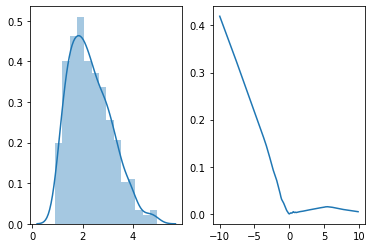

[Epoch 3402/5000] [D loss: -9.706831] [G loss: -0.006821]
[Epoch 3408/5000] [D loss: -9.590543] [G loss: -0.006371]
[Epoch 3414/5000] [D loss: -9.504637] [G loss: -0.006226]
[Epoch 3420/5000] [D loss: -9.433442] [G loss: -0.005900]
[Epoch 3426/5000] [D loss: -9.632065] [G loss: -0.007047]
[Epoch 3432/5000] [D loss: -9.794740] [G loss: -0.007107]
[Epoch 3438/5000] [D loss: -9.682071] [G loss: -0.006837]
[Epoch 3444/5000] [D loss: -9.639850] [G loss: -0.007034]
[Epoch 3450/5000] [D loss: -9.680216] [G loss: -0.006853]
[Epoch 3456/5000] [D loss: -9.764197] [G loss: -0.007583]
[Epoch 3462/5000] [D loss: -9.762780] [G loss: -0.007608]
[Epoch 3468/5000] [D loss: -9.859153] [G loss: -0.007748]
[Epoch 3474/5000] [D loss: -9.476898] [G loss: -0.006966]
[Epoch 3480/5000] [D loss: -9.563690] [G loss: -0.006768]
[Epoch 3486/5000] [D loss: -9.541451] [G loss: -0.007049]
[Epoch 3492/5000] [D loss: -9.632667] [G loss: -0.007266]
[Epoch 3498/5000] [D loss: -9.499170] [G loss: -0.006714]


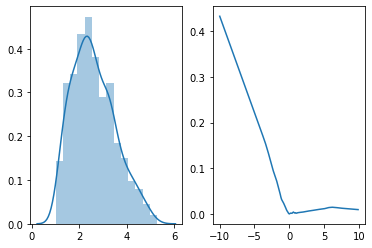

[Epoch 3504/5000] [D loss: -9.409328] [G loss: -0.006859]
[Epoch 3510/5000] [D loss: -9.346185] [G loss: -0.006178]
[Epoch 3516/5000] [D loss: -9.308054] [G loss: -0.006609]
[Epoch 3522/5000] [D loss: -9.310270] [G loss: -0.006172]
[Epoch 3528/5000] [D loss: -9.326983] [G loss: -0.006629]
[Epoch 3534/5000] [D loss: -9.471609] [G loss: -0.007188]
[Epoch 3540/5000] [D loss: -9.565576] [G loss: -0.007889]
[Epoch 3546/5000] [D loss: -9.615981] [G loss: -0.008024]
[Epoch 3552/5000] [D loss: -9.433011] [G loss: -0.007328]
[Epoch 3558/5000] [D loss: -9.488742] [G loss: -0.007538]
[Epoch 3564/5000] [D loss: -9.254923] [G loss: -0.006662]
[Epoch 3570/5000] [D loss: -9.240505] [G loss: -0.006444]
[Epoch 3576/5000] [D loss: -9.226119] [G loss: -0.006364]
[Epoch 3582/5000] [D loss: -9.286742] [G loss: -0.006985]
[Epoch 3588/5000] [D loss: -9.134540] [G loss: -0.006360]
[Epoch 3594/5000] [D loss: -9.084741] [G loss: -0.005941]
[Epoch 3600/5000] [D loss: -9.163745] [G loss: -0.006772]


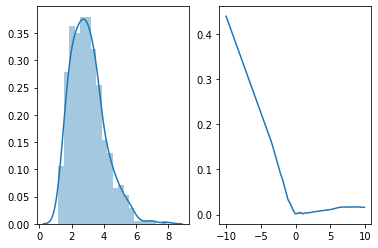

[Epoch 3606/5000] [D loss: -9.026203] [G loss: -0.005815]
[Epoch 3612/5000] [D loss: -8.944174] [G loss: -0.006210]
[Epoch 3618/5000] [D loss: -9.127051] [G loss: -0.006644]
[Epoch 3624/5000] [D loss: -9.182823] [G loss: -0.006638]
[Epoch 3630/5000] [D loss: -9.332314] [G loss: -0.007074]
[Epoch 3636/5000] [D loss: -9.244235] [G loss: -0.007065]
[Epoch 3642/5000] [D loss: -9.249222] [G loss: -0.007129]
[Epoch 3648/5000] [D loss: -9.193912] [G loss: -0.006494]
[Epoch 3654/5000] [D loss: -9.051204] [G loss: -0.006587]
[Epoch 3660/5000] [D loss: -9.014296] [G loss: -0.006246]
[Epoch 3666/5000] [D loss: -8.856008] [G loss: -0.005460]
[Epoch 3672/5000] [D loss: -8.794369] [G loss: -0.005917]
[Epoch 3678/5000] [D loss: -8.980563] [G loss: -0.006579]
[Epoch 3684/5000] [D loss: -9.005944] [G loss: -0.006289]
[Epoch 3690/5000] [D loss: -8.946430] [G loss: -0.006265]
[Epoch 3696/5000] [D loss: -9.145604] [G loss: -0.007621]


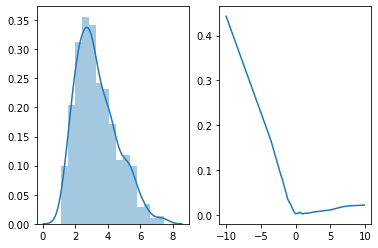

[Epoch 3702/5000] [D loss: -9.163645] [G loss: -0.007599]
[Epoch 3708/5000] [D loss: -9.044939] [G loss: -0.006436]
[Epoch 3714/5000] [D loss: -8.973514] [G loss: -0.006818]
[Epoch 3720/5000] [D loss: -8.820728] [G loss: -0.005407]
[Epoch 3726/5000] [D loss: -8.598898] [G loss: -0.005360]
[Epoch 3732/5000] [D loss: -8.585838] [G loss: -0.005191]
[Epoch 3738/5000] [D loss: -8.602609] [G loss: -0.005409]
[Epoch 3744/5000] [D loss: -8.795291] [G loss: -0.005317]
[Epoch 3750/5000] [D loss: -8.787996] [G loss: -0.006416]
[Epoch 3756/5000] [D loss: -8.920712] [G loss: -0.006674]
[Epoch 3762/5000] [D loss: -8.913542] [G loss: -0.007049]
[Epoch 3768/5000] [D loss: -8.876483] [G loss: -0.005783]
[Epoch 3774/5000] [D loss: -8.618086] [G loss: -0.005042]
[Epoch 3780/5000] [D loss: -8.607607] [G loss: -0.005118]
[Epoch 3786/5000] [D loss: -8.782741] [G loss: -0.006082]
[Epoch 3792/5000] [D loss: -8.566872] [G loss: -0.005139]
[Epoch 3798/5000] [D loss: -8.732077] [G loss: -0.006037]


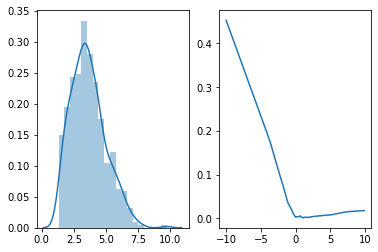

[Epoch 3804/5000] [D loss: -8.696507] [G loss: -0.005847]
[Epoch 3810/5000] [D loss: -8.440695] [G loss: -0.004890]
[Epoch 3816/5000] [D loss: -8.307868] [G loss: -0.004392]
[Epoch 3822/5000] [D loss: -8.268404] [G loss: -0.003677]
[Epoch 3828/5000] [D loss: -8.129375] [G loss: -0.003037]
[Epoch 3834/5000] [D loss: -8.093785] [G loss: -0.002408]
[Epoch 3840/5000] [D loss: -8.247960] [G loss: -0.004026]
[Epoch 3846/5000] [D loss: -8.476567] [G loss: -0.005269]
[Epoch 3852/5000] [D loss: -8.722875] [G loss: -0.007270]
[Epoch 3858/5000] [D loss: -8.969587] [G loss: -0.007171]
[Epoch 3864/5000] [D loss: -8.953020] [G loss: -0.007439]
[Epoch 3870/5000] [D loss: -8.468933] [G loss: -0.005061]
[Epoch 3876/5000] [D loss: -7.938055] [G loss: -0.002084]
[Epoch 3882/5000] [D loss: -7.936551] [G loss: -0.002942]
[Epoch 3888/5000] [D loss: -8.085835] [G loss: -0.002591]
[Epoch 3894/5000] [D loss: -8.104822] [G loss: -0.004036]
[Epoch 3900/5000] [D loss: -8.104432] [G loss: -0.003186]


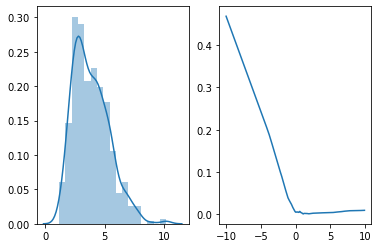

[Epoch 3906/5000] [D loss: -8.153334] [G loss: -0.003136]
[Epoch 3912/5000] [D loss: -8.260914] [G loss: -0.003792]
[Epoch 3918/5000] [D loss: -8.209029] [G loss: -0.004608]
[Epoch 3924/5000] [D loss: -8.260130] [G loss: -0.003745]
[Epoch 3930/5000] [D loss: -8.043021] [G loss: -0.002679]
[Epoch 3936/5000] [D loss: -8.059699] [G loss: -0.002585]
[Epoch 3942/5000] [D loss: -8.169341] [G loss: -0.002846]
[Epoch 3948/5000] [D loss: -7.857439] [G loss: -0.002342]
[Epoch 3954/5000] [D loss: -7.839442] [G loss: -0.002338]
[Epoch 3960/5000] [D loss: -7.821144] [G loss: -0.002542]
[Epoch 3966/5000] [D loss: -7.881064] [G loss: -0.002745]
[Epoch 3972/5000] [D loss: -8.026454] [G loss: -0.003756]
[Epoch 3978/5000] [D loss: -8.180941] [G loss: -0.003492]
[Epoch 3984/5000] [D loss: -8.327203] [G loss: -0.003944]
[Epoch 3990/5000] [D loss: -8.279423] [G loss: -0.003844]
[Epoch 3996/5000] [D loss: -8.337045] [G loss: -0.004050]


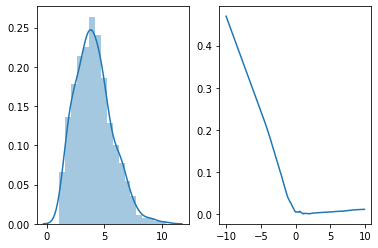

[Epoch 4002/5000] [D loss: -8.398932] [G loss: -0.004292]
[Epoch 4008/5000] [D loss: -8.220861] [G loss: -0.004712]
[Epoch 4014/5000] [D loss: -8.500907] [G loss: -0.004560]
[Epoch 4020/5000] [D loss: -8.286417] [G loss: -0.004031]
[Epoch 4026/5000] [D loss: -8.261146] [G loss: -0.003367]
[Epoch 4032/5000] [D loss: -8.428738] [G loss: -0.004264]
[Epoch 4038/5000] [D loss: -7.952639] [G loss: -0.002836]
[Epoch 4044/5000] [D loss: -8.044098] [G loss: -0.003155]
[Epoch 4050/5000] [D loss: -8.275343] [G loss: -0.004259]
[Epoch 4056/5000] [D loss: -8.273092] [G loss: -0.004283]
[Epoch 4062/5000] [D loss: -8.525589] [G loss: -0.003921]
[Epoch 4068/5000] [D loss: -8.014485] [G loss: -0.002846]
[Epoch 4074/5000] [D loss: -8.197746] [G loss: -0.003611]
[Epoch 4080/5000] [D loss: -8.146595] [G loss: -0.002922]
[Epoch 4086/5000] [D loss: -8.158505] [G loss: -0.003292]
[Epoch 4092/5000] [D loss: -8.110812] [G loss: -0.003675]
[Epoch 4098/5000] [D loss: -8.022361] [G loss: -0.002307]


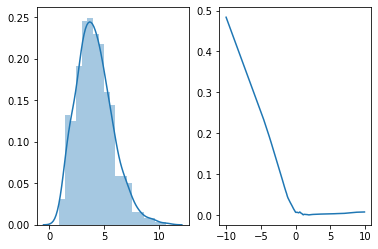

[Epoch 4104/5000] [D loss: -8.130927] [G loss: -0.002958]
[Epoch 4110/5000] [D loss: -8.131845] [G loss: -0.003098]
[Epoch 4116/5000] [D loss: -8.400054] [G loss: -0.004140]
[Epoch 4122/5000] [D loss: -8.058478] [G loss: -0.002225]
[Epoch 4128/5000] [D loss: -8.031461] [G loss: -0.002447]
[Epoch 4134/5000] [D loss: -7.989189] [G loss: -0.001802]
[Epoch 4140/5000] [D loss: -7.746523] [G loss: -0.001887]
[Epoch 4146/5000] [D loss: -7.997872] [G loss: -0.003045]
[Epoch 4152/5000] [D loss: -7.939281] [G loss: -0.001841]
[Epoch 4158/5000] [D loss: -8.091690] [G loss: -0.002896]
[Epoch 4164/5000] [D loss: -8.501896] [G loss: -0.004565]
[Epoch 4170/5000] [D loss: -8.398322] [G loss: -0.004191]
[Epoch 4176/5000] [D loss: -8.395344] [G loss: -0.004380]
[Epoch 4182/5000] [D loss: -8.111669] [G loss: -0.003765]
[Epoch 4188/5000] [D loss: -8.316527] [G loss: -0.004058]
[Epoch 4194/5000] [D loss: -8.389796] [G loss: -0.004199]
[Epoch 4200/5000] [D loss: -8.476435] [G loss: -0.004614]


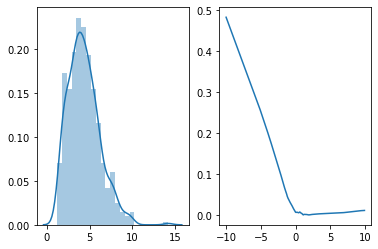

[Epoch 4206/5000] [D loss: -8.371446] [G loss: -0.004152]
[Epoch 4212/5000] [D loss: -8.578499] [G loss: -0.004812]
[Epoch 4218/5000] [D loss: -8.315647] [G loss: -0.003870]
[Epoch 4224/5000] [D loss: -8.155540] [G loss: -0.003969]
[Epoch 4230/5000] [D loss: -8.259125] [G loss: -0.004117]
[Epoch 4236/5000] [D loss: -8.196568] [G loss: -0.003366]
[Epoch 4242/5000] [D loss: -8.307819] [G loss: -0.003219]
[Epoch 4248/5000] [D loss: -8.141986] [G loss: -0.002699]
[Epoch 4254/5000] [D loss: -8.018101] [G loss: -0.002968]
[Epoch 4260/5000] [D loss: -8.333327] [G loss: -0.003609]
[Epoch 4266/5000] [D loss: -7.912732] [G loss: -0.002764]
[Epoch 4272/5000] [D loss: -8.056670] [G loss: -0.003366]
[Epoch 4278/5000] [D loss: -8.335883] [G loss: -0.003986]
[Epoch 4284/5000] [D loss: -8.265632] [G loss: -0.004753]
[Epoch 4290/5000] [D loss: -8.532467] [G loss: -0.004640]
[Epoch 4296/5000] [D loss: -8.134823] [G loss: -0.002833]


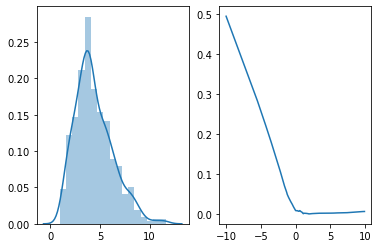

[Epoch 4302/5000] [D loss: -8.041557] [G loss: -0.002575]
[Epoch 4308/5000] [D loss: -8.213449] [G loss: -0.004038]
[Epoch 4314/5000] [D loss: -8.381502] [G loss: -0.003615]
[Epoch 4320/5000] [D loss: -8.029844] [G loss: -0.002028]
[Epoch 4326/5000] [D loss: -8.255607] [G loss: -0.003435]
[Epoch 4332/5000] [D loss: -8.043266] [G loss: -0.002945]
[Epoch 4338/5000] [D loss: -8.474490] [G loss: -0.004862]
[Epoch 4344/5000] [D loss: -8.447567] [G loss: -0.004908]
[Epoch 4350/5000] [D loss: -8.451643] [G loss: -0.004450]
[Epoch 4356/5000] [D loss: -8.216742] [G loss: -0.003467]
[Epoch 4362/5000] [D loss: -8.004664] [G loss: -0.002102]
[Epoch 4368/5000] [D loss: -8.147868] [G loss: -0.002806]
[Epoch 4374/5000] [D loss: -8.024335] [G loss: -0.001919]
[Epoch 4380/5000] [D loss: -8.038417] [G loss: -0.002964]
[Epoch 4386/5000] [D loss: -8.326996] [G loss: -0.003631]
[Epoch 4392/5000] [D loss: -7.998088] [G loss: -0.002700]
[Epoch 4398/5000] [D loss: -8.109387] [G loss: -0.002371]


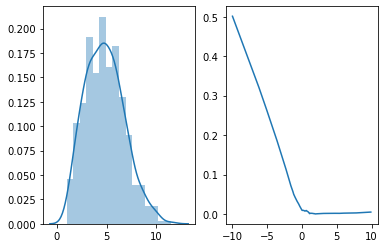

[Epoch 4404/5000] [D loss: -7.901101] [G loss: -0.000955]
[Epoch 4410/5000] [D loss: -8.105392] [G loss: -0.002981]
[Epoch 4416/5000] [D loss: -8.298934] [G loss: -0.003978]
[Epoch 4422/5000] [D loss: -8.349534] [G loss: -0.003453]
[Epoch 4428/5000] [D loss: -8.100263] [G loss: -0.002073]
[Epoch 4434/5000] [D loss: -7.857532] [G loss: -0.001990]
[Epoch 4440/5000] [D loss: -8.029380] [G loss: -0.002071]
[Epoch 4446/5000] [D loss: -8.176952] [G loss: -0.003587]
[Epoch 4452/5000] [D loss: -8.294713] [G loss: -0.002887]
[Epoch 4458/5000] [D loss: -8.156854] [G loss: -0.003265]
[Epoch 4464/5000] [D loss: -8.273172] [G loss: -0.003477]
[Epoch 4470/5000] [D loss: -8.361213] [G loss: -0.003513]
[Epoch 4476/5000] [D loss: -8.449045] [G loss: -0.004401]
[Epoch 4482/5000] [D loss: -8.661913] [G loss: -0.006409]
[Epoch 4488/5000] [D loss: -8.592451] [G loss: -0.005255]
[Epoch 4494/5000] [D loss: -8.854998] [G loss: -0.006042]
[Epoch 4500/5000] [D loss: -8.377931] [G loss: -0.003677]


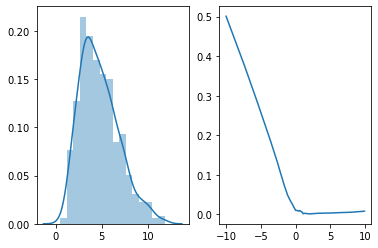

[Epoch 4506/5000] [D loss: -8.186872] [G loss: -0.003377]
[Epoch 4512/5000] [D loss: -8.295954] [G loss: -0.003715]
[Epoch 4518/5000] [D loss: -8.337926] [G loss: -0.003693]
[Epoch 4524/5000] [D loss: -8.312560] [G loss: -0.003526]
[Epoch 4530/5000] [D loss: -7.880568] [G loss: -0.002215]
[Epoch 4536/5000] [D loss: -8.235265] [G loss: -0.003452]
[Epoch 4542/5000] [D loss: -8.556087] [G loss: -0.005032]
[Epoch 4548/5000] [D loss: -8.670297] [G loss: -0.006378]
[Epoch 4554/5000] [D loss: -9.005404] [G loss: -0.008703]
[Epoch 4560/5000] [D loss: -8.944622] [G loss: -0.007896]
[Epoch 4566/5000] [D loss: -8.955244] [G loss: -0.007581]
[Epoch 4572/5000] [D loss: -8.679903] [G loss: -0.004865]
[Epoch 4578/5000] [D loss: -8.477798] [G loss: -0.005401]
[Epoch 4584/5000] [D loss: -8.705876] [G loss: -0.005769]
[Epoch 4590/5000] [D loss: -8.511023] [G loss: -0.005413]
[Epoch 4596/5000] [D loss: -8.666697] [G loss: -0.006257]


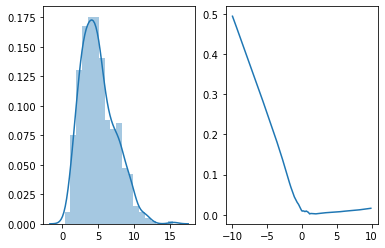

[Epoch 4602/5000] [D loss: -8.911360] [G loss: -0.006740]
[Epoch 4608/5000] [D loss: -8.354969] [G loss: -0.004731]
[Epoch 4614/5000] [D loss: -8.399575] [G loss: -0.004314]
[Epoch 4620/5000] [D loss: -8.404225] [G loss: -0.004669]
[Epoch 4626/5000] [D loss: -8.534741] [G loss: -0.007039]
[Epoch 4632/5000] [D loss: -8.557233] [G loss: -0.005024]
[Epoch 4638/5000] [D loss: -8.449312] [G loss: -0.004383]
[Epoch 4644/5000] [D loss: -8.288048] [G loss: -0.002569]
[Epoch 4650/5000] [D loss: -8.410286] [G loss: -0.004660]
[Epoch 4656/5000] [D loss: -8.458948] [G loss: -0.005090]
[Epoch 4662/5000] [D loss: -8.446457] [G loss: -0.005038]
[Epoch 4668/5000] [D loss: -8.023514] [G loss: -0.004328]
[Epoch 4674/5000] [D loss: -8.548513] [G loss: -0.004825]
[Epoch 4680/5000] [D loss: -8.107351] [G loss: -0.002893]
[Epoch 4686/5000] [D loss: -8.131972] [G loss: -0.003272]
[Epoch 4692/5000] [D loss: -8.030971] [G loss: -0.003097]
[Epoch 4698/5000] [D loss: -8.453519] [G loss: -0.005122]


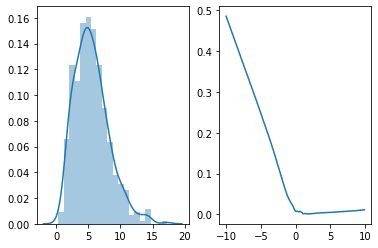

[Epoch 4704/5000] [D loss: -8.431474] [G loss: -0.004478]
[Epoch 4710/5000] [D loss: -8.165650] [G loss: -0.003170]
[Epoch 4716/5000] [D loss: -8.248397] [G loss: -0.003712]
[Epoch 4722/5000] [D loss: -8.231287] [G loss: -0.004314]
[Epoch 4728/5000] [D loss: -8.226868] [G loss: -0.004101]
[Epoch 4734/5000] [D loss: -8.565945] [G loss: -0.005766]
[Epoch 4740/5000] [D loss: -8.624751] [G loss: -0.005477]
[Epoch 4746/5000] [D loss: -8.311616] [G loss: -0.004199]
[Epoch 4752/5000] [D loss: -8.061543] [G loss: -0.003208]
[Epoch 4758/5000] [D loss: -8.216175] [G loss: -0.004071]
[Epoch 4764/5000] [D loss: -7.921693] [G loss: -0.002497]
[Epoch 4770/5000] [D loss: -8.042953] [G loss: -0.002228]
[Epoch 4776/5000] [D loss: -7.998219] [G loss: -0.004500]
[Epoch 4782/5000] [D loss: -8.670658] [G loss: -0.006397]
[Epoch 4788/5000] [D loss: -8.498117] [G loss: -0.006788]
[Epoch 4794/5000] [D loss: -9.295689] [G loss: -0.009792]
[Epoch 4800/5000] [D loss: -9.163434] [G loss: -0.008820]


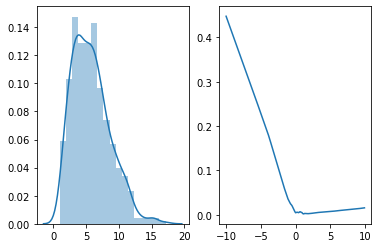

[Epoch 4806/5000] [D loss: -8.471125] [G loss: -0.005477]
[Epoch 4812/5000] [D loss: -8.445897] [G loss: -0.004906]
[Epoch 4818/5000] [D loss: -8.465760] [G loss: -0.006729]
[Epoch 4824/5000] [D loss: -8.543038] [G loss: -0.004794]
[Epoch 4830/5000] [D loss: -7.997716] [G loss: -0.003661]
[Epoch 4836/5000] [D loss: -8.064573] [G loss: -0.003826]
[Epoch 4842/5000] [D loss: -8.478461] [G loss: -0.004539]
[Epoch 4848/5000] [D loss: -7.919940] [G loss: -0.002989]
[Epoch 4854/5000] [D loss: -7.883139] [G loss: -0.003320]
[Epoch 4860/5000] [D loss: -8.068540] [G loss: -0.002751]
[Epoch 4866/5000] [D loss: -8.170408] [G loss: -0.004092]
[Epoch 4872/5000] [D loss: -7.984830] [G loss: -0.001566]
[Epoch 4878/5000] [D loss: -7.805089] [G loss: -0.002864]
[Epoch 4884/5000] [D loss: -7.580932] [G loss: -0.001445]
[Epoch 4890/5000] [D loss: -7.941774] [G loss: -0.002966]
[Epoch 4896/5000] [D loss: -8.079015] [G loss: -0.002549]


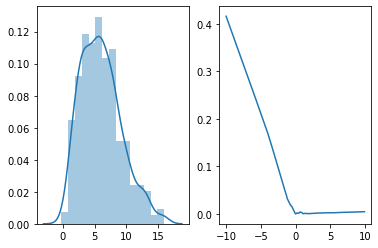

[Epoch 4902/5000] [D loss: -8.065082] [G loss: -0.003774]
[Epoch 4908/5000] [D loss: -8.185891] [G loss: -0.005186]
[Epoch 4914/5000] [D loss: -9.184332] [G loss: -0.010657]
[Epoch 4920/5000] [D loss: -8.976936] [G loss: -0.007437]
[Epoch 4926/5000] [D loss: -9.005046] [G loss: -0.009031]
[Epoch 4932/5000] [D loss: -8.785233] [G loss: -0.007108]
[Epoch 4938/5000] [D loss: -8.868448] [G loss: -0.008914]
[Epoch 4944/5000] [D loss: -9.230355] [G loss: -0.010246]
[Epoch 4950/5000] [D loss: -9.187346] [G loss: -0.010226]
[Epoch 4956/5000] [D loss: -9.232847] [G loss: -0.011534]
[Epoch 4962/5000] [D loss: -9.161776] [G loss: -0.008446]
[Epoch 4968/5000] [D loss: -8.690681] [G loss: -0.007052]
[Epoch 4974/5000] [D loss: -7.936627] [G loss: -0.004453]
[Epoch 4980/5000] [D loss: -7.750053] [G loss: -0.001565]
[Epoch 4986/5000] [D loss: -9.132736] [G loss: -0.016303]
[Epoch 4992/5000] [D loss: -9.480119] [G loss: -0.015384]
[Epoch 4998/5000] [D loss: -9.381174] [G loss: -0.014854]


In [213]:
%matplotlib inline
# ----------
#  Training
# ----------

lambda_gp=10.

n_epochs=5000

n_critic=6



for epoch in range(n_epochs):

    # Configure input
    real_imgs = m.sample([500]).to(device)

    # ---------------------
    #  Train Discriminator
    # ---------------------

    optimizer_D.zero_grad()

    # Sample noise as generator input
    z = Tensor(np.random.normal(0, 1, (real_imgs.shape[0], lat_dim)))

    # Generate a batch of images
    fake_imgs = generator(z)

    # Real images
    real_validity = discriminator(real_imgs)
    # Fake images
    fake_validity = discriminator(fake_imgs)
    # Gradient penalty
    gradient_penalty = compute_gradient_penalty(discriminator, real_imgs, fake_imgs)
    # Adversarial loss
    d_loss = -torch.mean(real_validity) + torch.mean(fake_validity) +lambda_gp * gradient_penalty

    d_loss.backward()
    optimizer_D.step()

    optimizer_G.zero_grad()

    # Train the generator every n_critic steps
    if epoch % n_critic == 0:

        # -----------------
        #  Train Generator
        # -----------------

        # Generate a batch of images
        fake_imgs = generator(z)
        # Loss measures generator's ability to fool the discriminator
        # Train on fake images
        fake_validity = discriminator(fake_imgs)
        g_loss = -torch.mean(fake_validity)

        
        g_loss.backward()
        optimizer_G.step()
        
        
        print(
            "[Epoch %d/%d] [D loss: %f] [G loss: %f]"
            % (epoch, n_epochs, d_loss.item(), g_loss.item())
            )
        
    if epoch % 100 == 0:
        viewGAN(discriminator, generator)

    

    

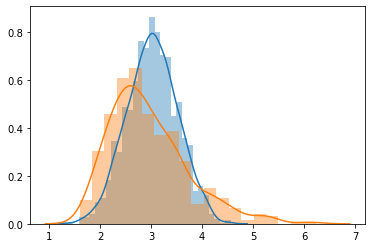

In [183]:
fig, ax= plt.subplots()

sns.distplot(real_data.cpu(), ax=ax)

z = Tensor(np.random.normal(0, 1, (500, lat_dim)))
fake_data=generator(z).detach().cpu()
sns.distplot(fake_data, ax=ax)

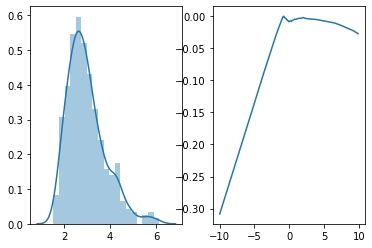

In [185]:
viewGAN(discriminator, generator)
